<a href="https://colab.research.google.com/github/Gr1Lo/trsgi_nets/blob/main/regressions_gh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Чтение данных и подгрузка библиотек

In [ ]:
!rm -r trsgi_nets
!git clone https://github.com/Gr1Lo/trsgi_nets.git

%cd trsgi_nets/
%load_ext google.colab.data_table
!pip install pyEOF
!pip install kneed

from clustering import *
from models import *
from read_data import *
from train_test_preparing import *
from utils import *
from corr_coef import *

import os

%cd ..
if os.path.isfile('drive/MyDrive/trsgi_values.pickle'):
    trsgi_values = read_pickle('drive/MyDrive/trsgi_values.pickle')
else:
    trsgi_values = r_execel('drive/MyDrive/breitenmoser2014.xlsx')
    save_pickle('drive/MyDrive/trsgi_values.pickle', trsgi_values)


if os.path.isfile('drive/MyDrive/test.pickle'):
    df_data = read_pickle('drive/MyDrive/test.pickle')
    ds_n = read_pickle('drive/MyDrive/ds_n.pickle')
else:
    df_data, ds_n = r_netCDF('drive/MyDrive/test.nc')
    save_pickle('drive/MyDrive/test.pickle', df_data)
    save_pickle('drive/MyDrive/ds_n.pickle', ds_n) 

# Формирование тренировочных наборов данных для регрессии

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


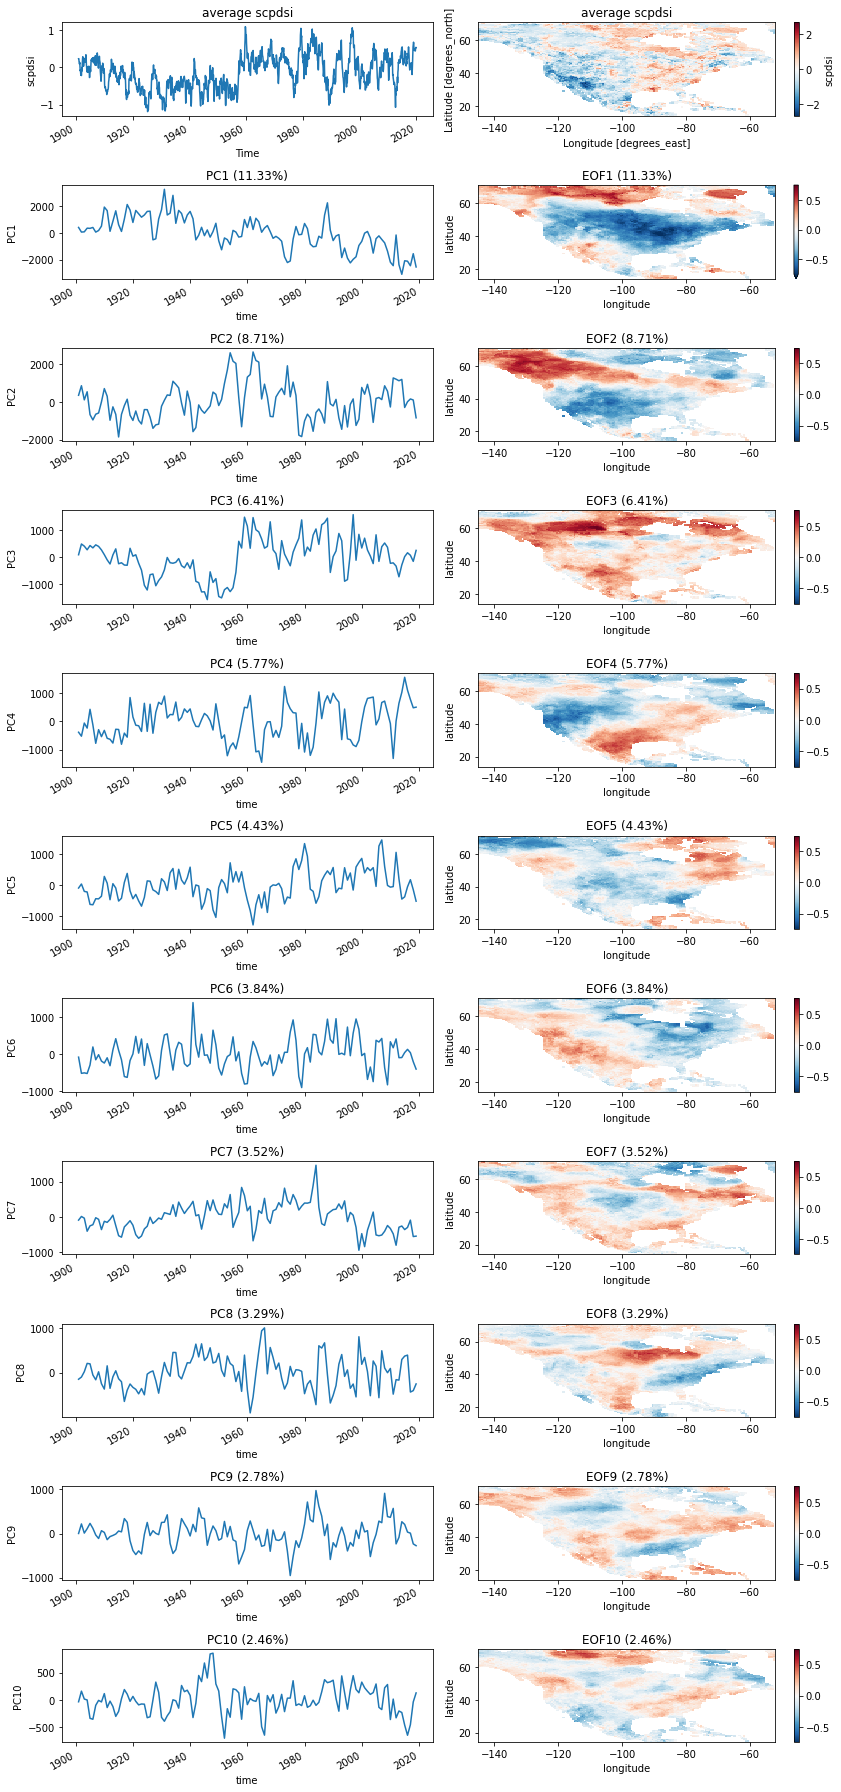

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


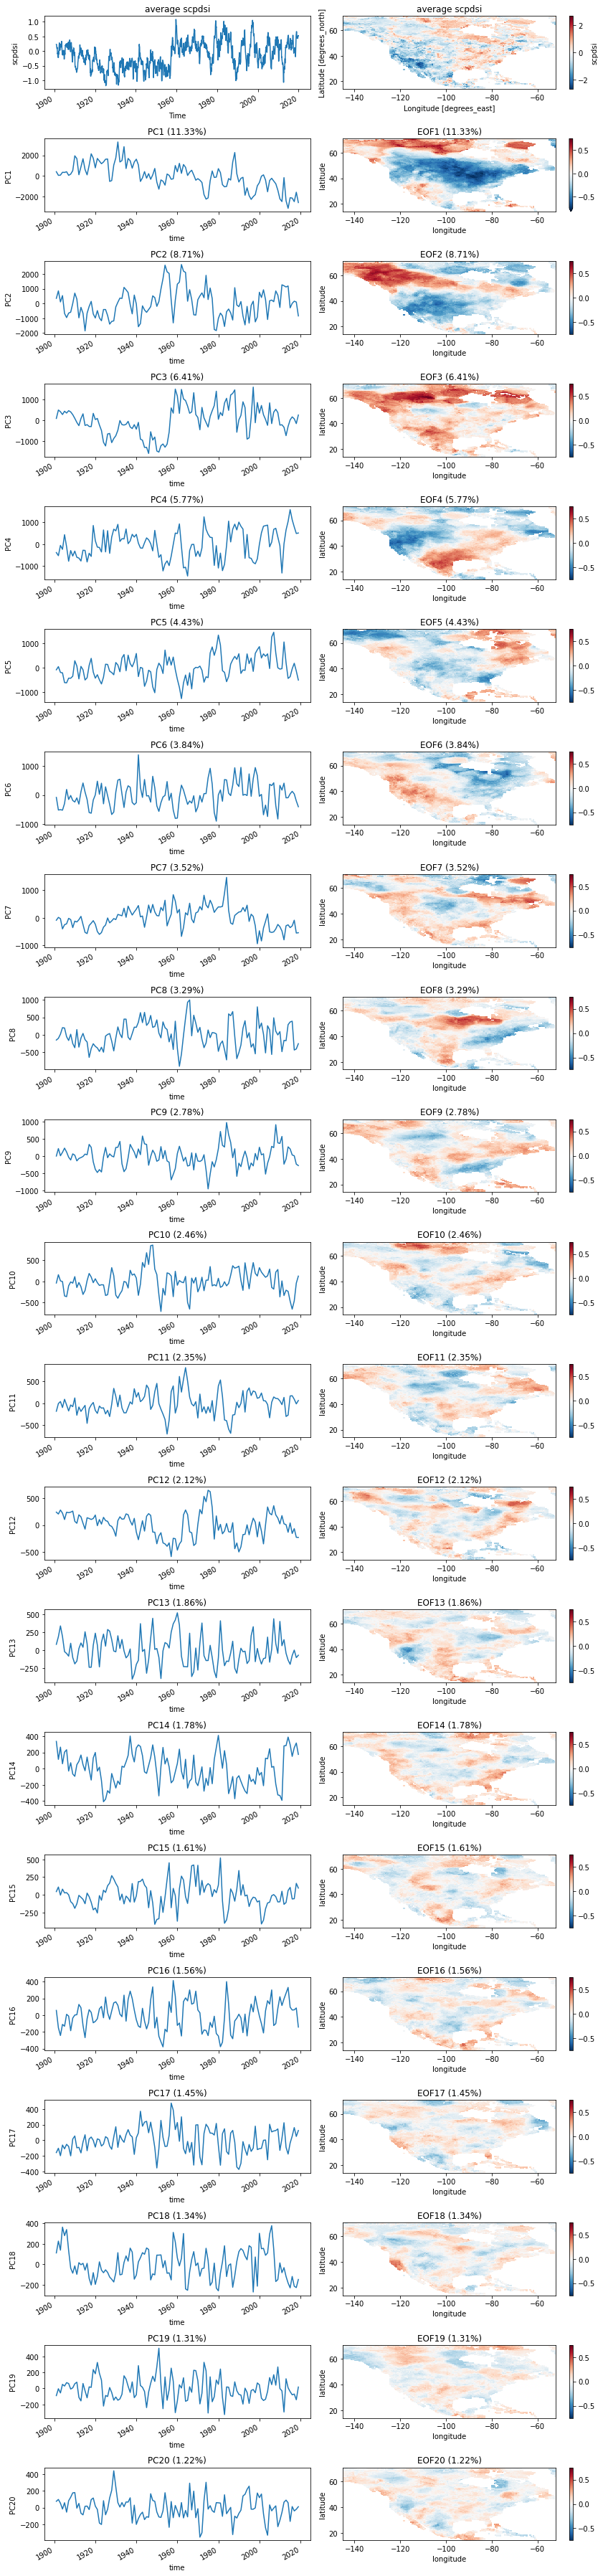

In [2]:
pca, eofs, pcs, evfs, eigvals = eof_an(df_data, ds_n, n = 10, scale_type = 2, pca_type = None)

#20 паттернов EOF, объясняет 69.14% дисперсии
pca20, eofs20, pcs20, evfs20, eigvals20 = eof_an(df_data, ds_n, n = 20, scale_type = 2, pca_type = None)

list_regr = []
list_regr20 = []
post_list_regr = []

#Добавил другие размеры групп
ll = [None, 4, 5, 6, 7]

for tl in ll:
  type_parts = tl #выбор единицы деления (пятилетки, шестилетки и тд.) 
  if tl == None:
    a = [None]
  else:
    a = list(range(0,type_parts))

  #наборы для регрессиии
  for t_use_norm in (True, False):
    for t_use_aug in (True, False):
      for a_m in a:
        postf = 'regr_norm' + str(t_use_norm) + '_aug' + str(t_use_aug)  + '_use' + str(type_parts) + str(a_m)
        var_n = 'tr_t' + postf + ', tr_l' + postf + ', te_t' + postf + ', te_l' + postf + ', v_r' + postf
        #новый параметр p_v - доля тестовой выборки в изначальном наборе
        exec(var_n + ' = sta_split(trsgi_values, pcs, use_norm = ' + str(t_use_norm) + ", type_op = 'regr', use_aug = " + str(t_use_aug) + ', use5 = ' + str(a_m) + ", type_parts = " + str(type_parts) + ', p_v=0)')
        exec('list_regr.append([' + var_n + '])')

        #20 EOF
        exec(var_n + ' = sta_split(trsgi_values, pcs20, use_norm = ' + str(t_use_norm) + ", type_op = 'regr', use_aug = " + str(t_use_aug) + ', use5 = ' + str(a_m) + ", type_parts = " + str(type_parts) + ', p_v=0)')
        exec('list_regr20.append([' + var_n + '])')

        post_list_regr.append(postf)

# Обучение моделей

**Нотация моделей (названия переменных, в которые сохранены модели, указаны над графиком):** <br><br>
*regr* - регрессионная  <br>
*normTrue/normFalse* - нормированные или ненормированные данные<br>
*augTrue/augFalse* - синтетически расширенный набор данных или нет<br>
*use<число>* - ширина единицы деления (четырехлетки, пятилетки и тд.)<br>
*useX<число>* - использовалось ли разделение оп X-леткам плюс число смещения отсчета (*useNoneNone* - не использовалось)<br>
eof0 - eof не использовались<br>
eof1 - использовались eof<br>
eof2 - использовались примитивы eof<br>

regr_normTrue_augTrue_useNoneNone_useEOF0
10 EOF


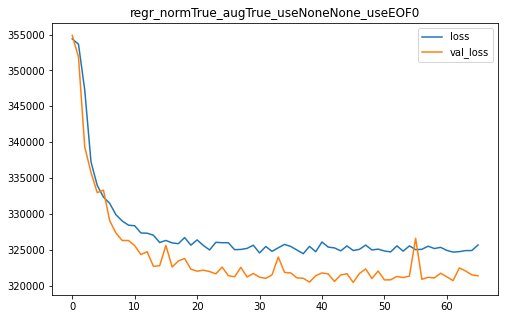

20 EOF


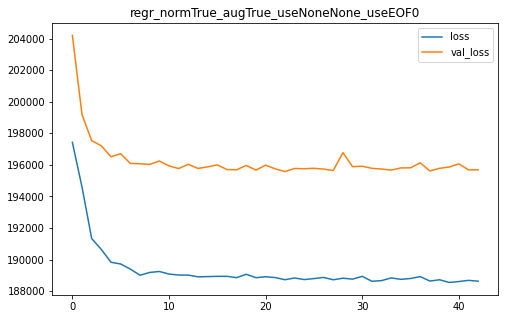

10 EOF, batch-norm


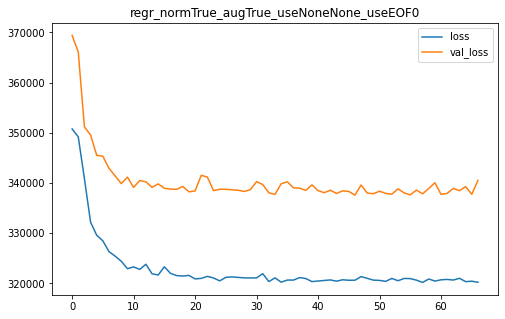

20 EOF, batch-norm


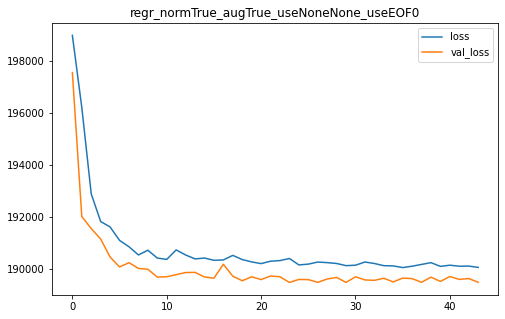

regr_normTrue_augTrue_useNoneNone_useEOF1
10 EOF


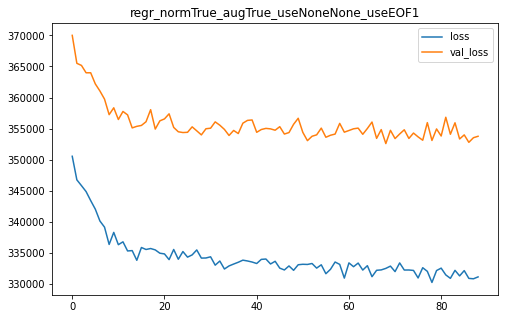

20 EOF


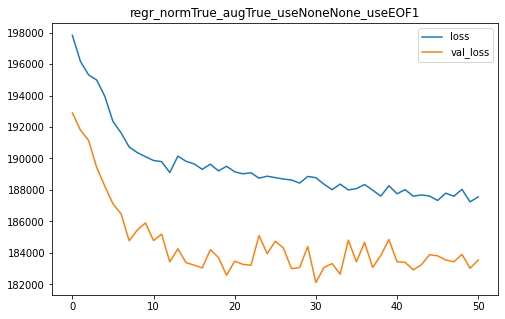

10 EOF, batch-norm


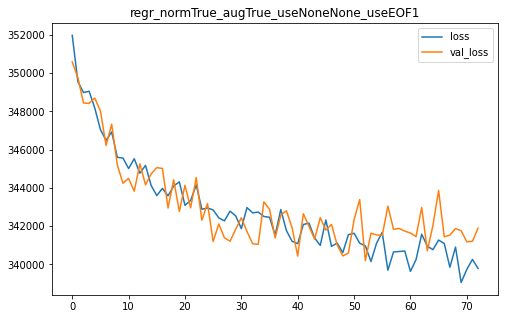

20 EOF, batch-norm


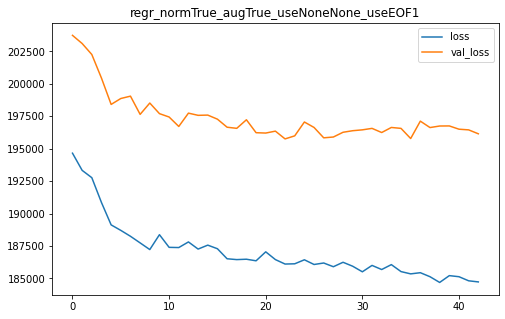

regr_normTrue_augTrue_useNoneNone_useEOF2
10 EOF


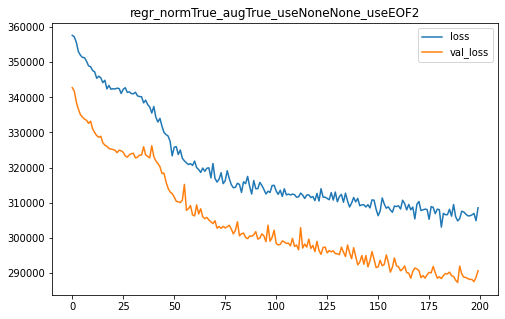

20 EOF


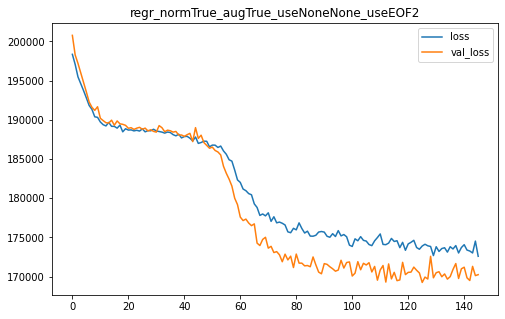

10 EOF, batch-norm


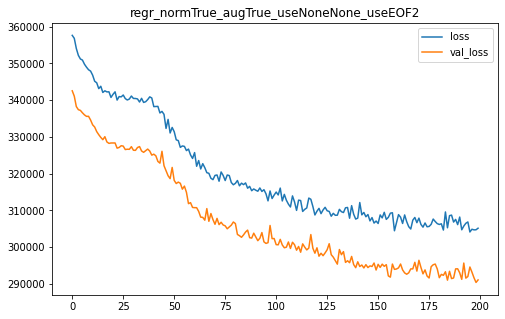

20 EOF, batch-norm


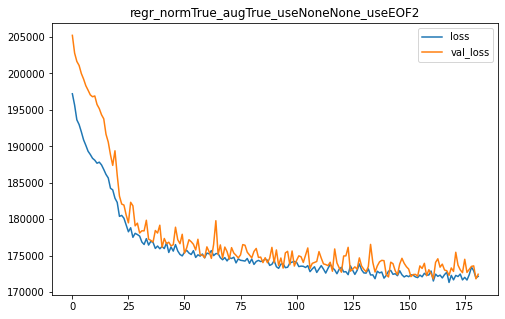

regr_normTrue_augFalse_useNoneNone_useEOF0
10 EOF


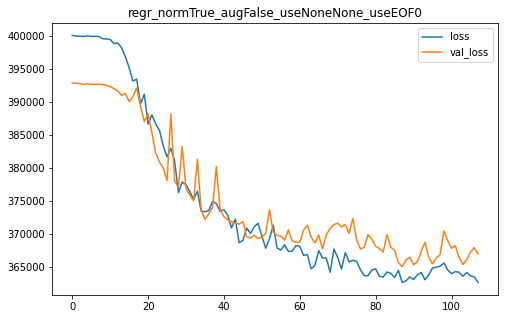

20 EOF


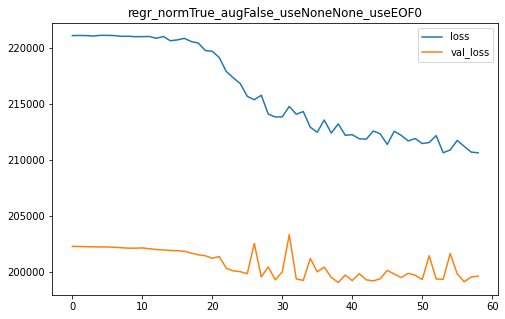

10 EOF, batch-norm


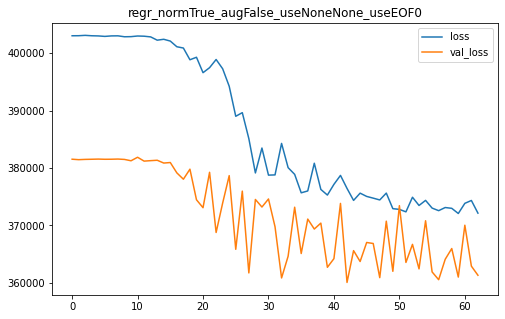

20 EOF, batch-norm


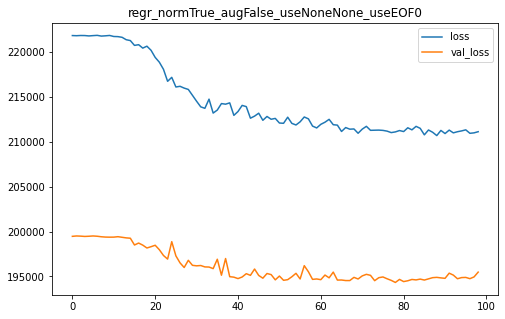

regr_normTrue_augFalse_useNoneNone_useEOF1
10 EOF


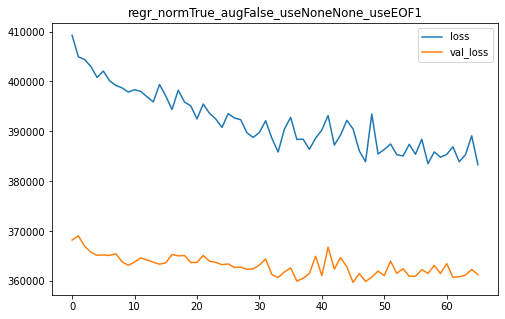

20 EOF


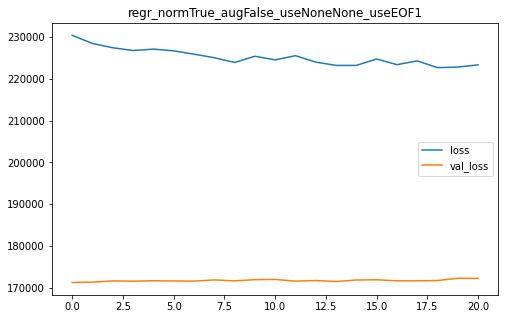

10 EOF, batch-norm


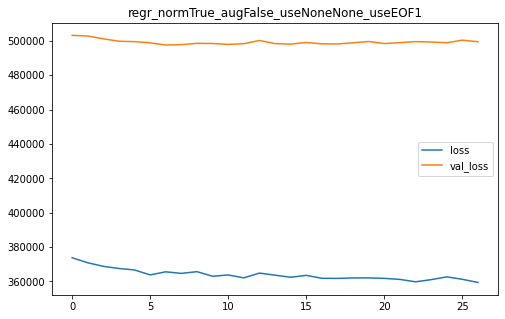

20 EOF, batch-norm


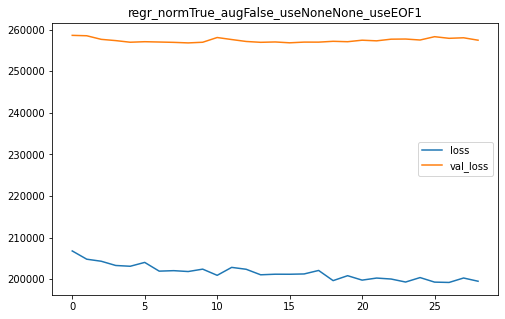

regr_normTrue_augFalse_useNoneNone_useEOF2
10 EOF


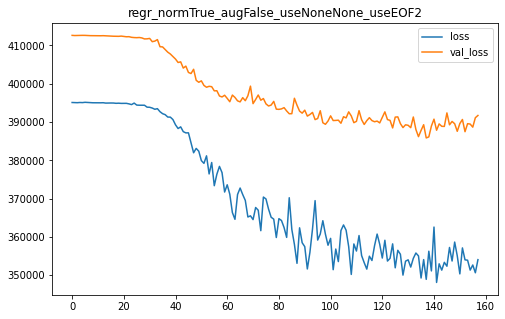

20 EOF


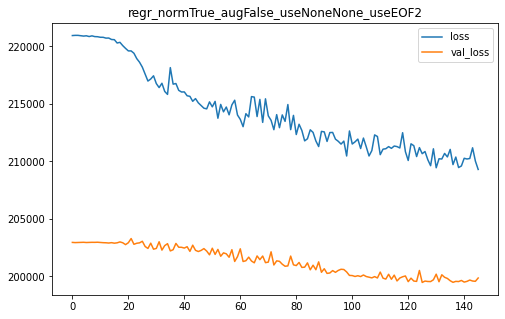

10 EOF, batch-norm


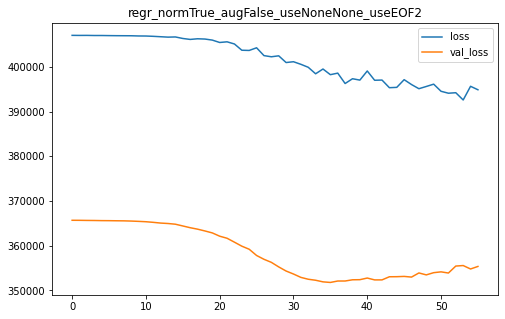

20 EOF, batch-norm


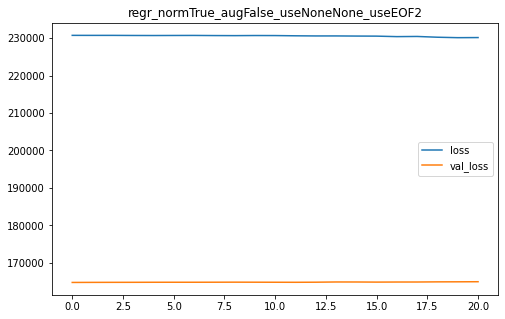

regr_normFalse_augTrue_useNoneNone_useEOF0
10 EOF


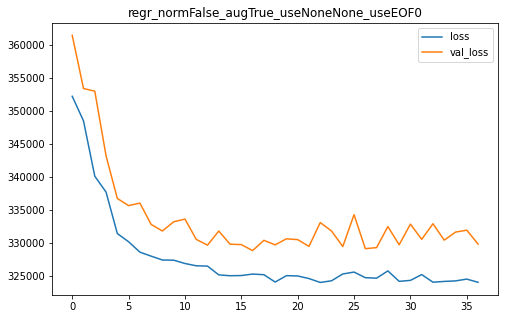

20 EOF


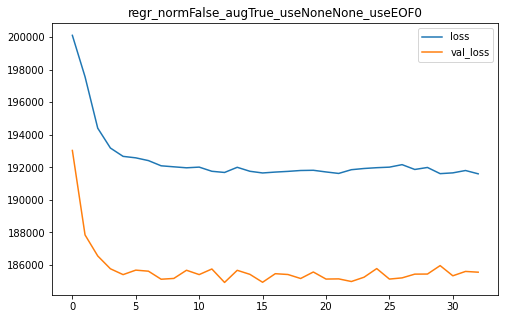

10 EOF, batch-norm


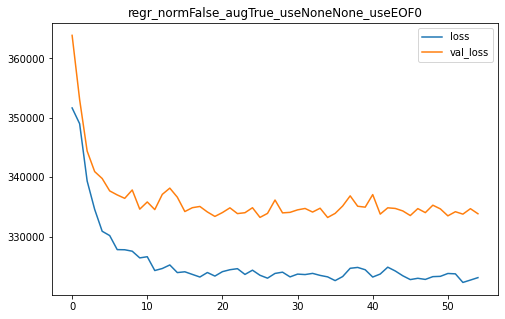

20 EOF, batch-norm


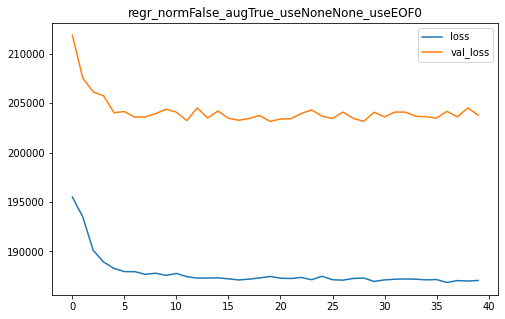

regr_normFalse_augTrue_useNoneNone_useEOF1
10 EOF


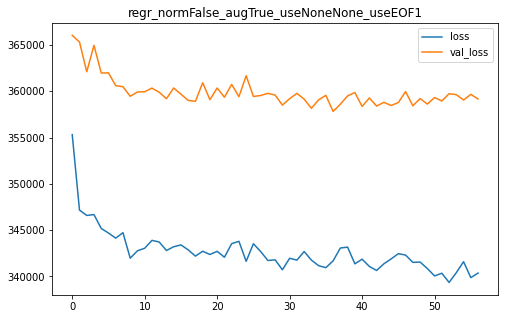

20 EOF


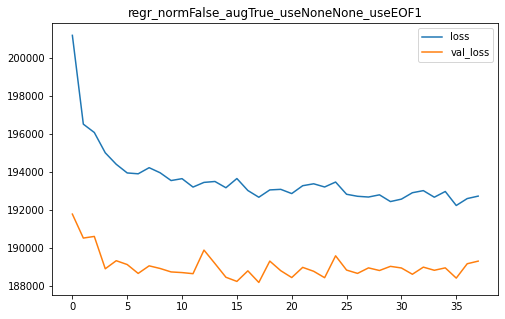

10 EOF, batch-norm


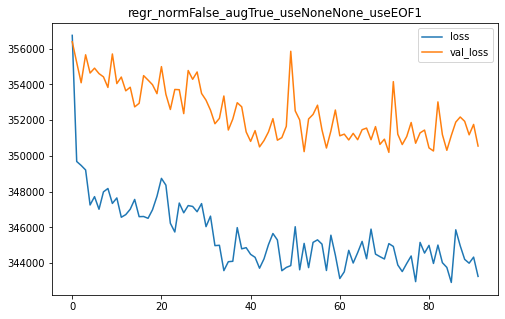

20 EOF, batch-norm


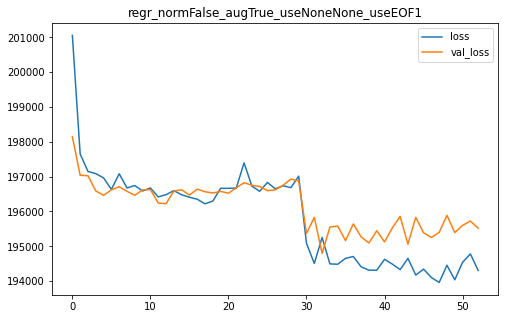

regr_normFalse_augTrue_useNoneNone_useEOF2
10 EOF


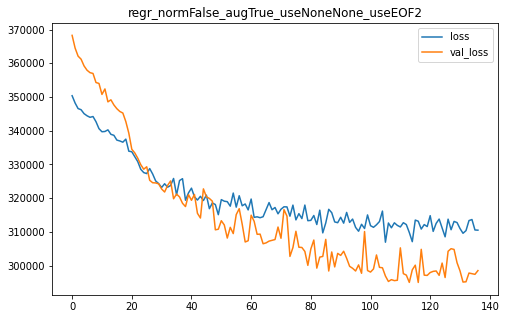

20 EOF


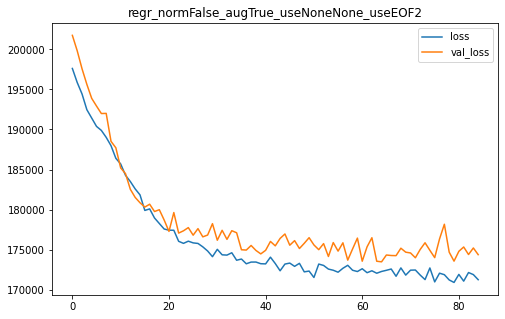

10 EOF, batch-norm


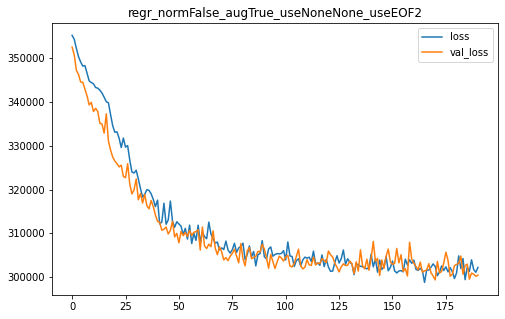

20 EOF, batch-norm


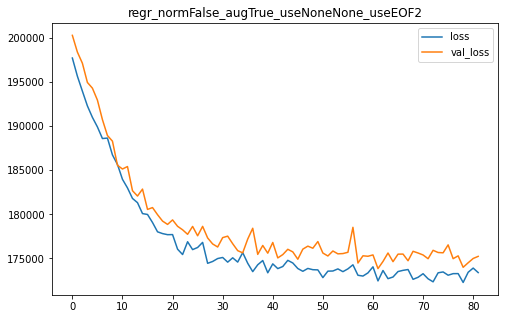

regr_normFalse_augFalse_useNoneNone_useEOF0
10 EOF


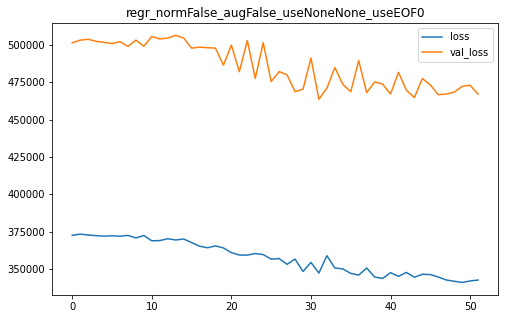

20 EOF


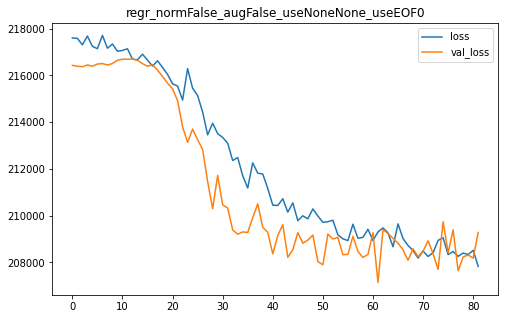

10 EOF, batch-norm


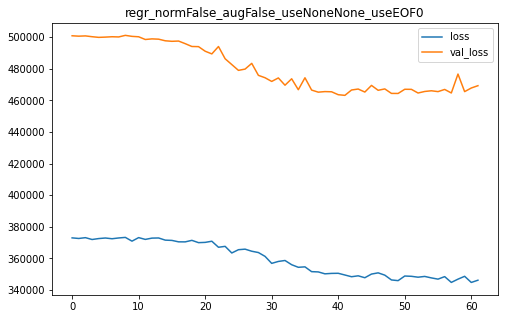

20 EOF, batch-norm


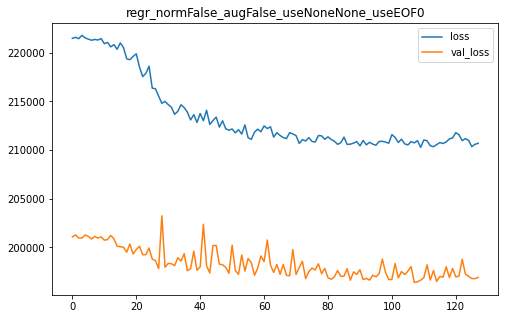

regr_normFalse_augFalse_useNoneNone_useEOF1
10 EOF


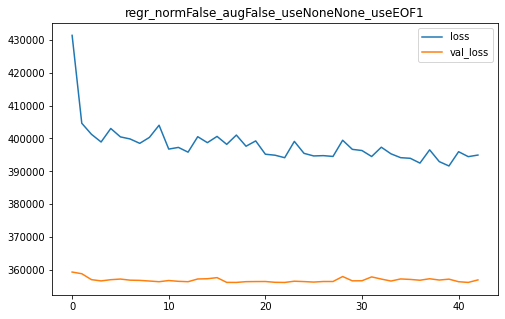

20 EOF


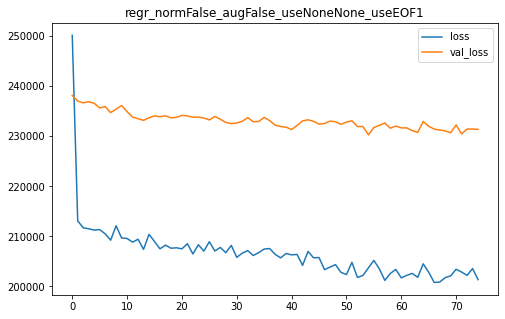

10 EOF, batch-norm


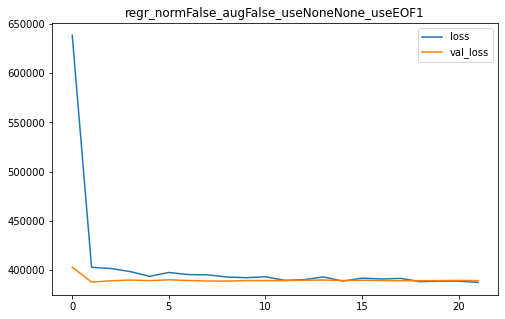

20 EOF, batch-norm


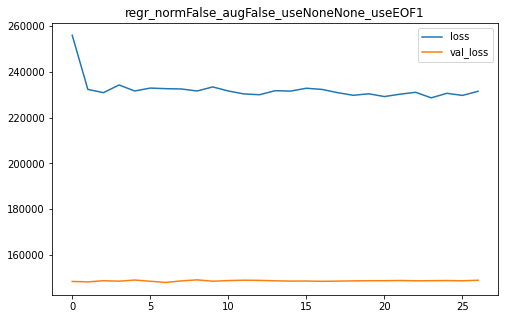

regr_normFalse_augFalse_useNoneNone_useEOF2
10 EOF


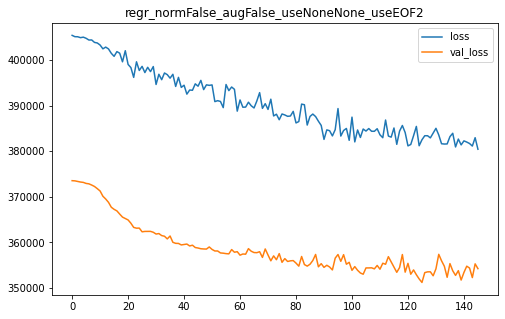

20 EOF


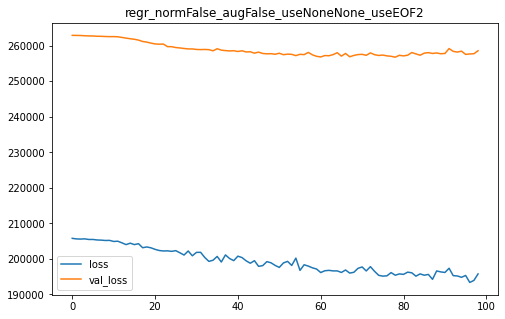

10 EOF, batch-norm


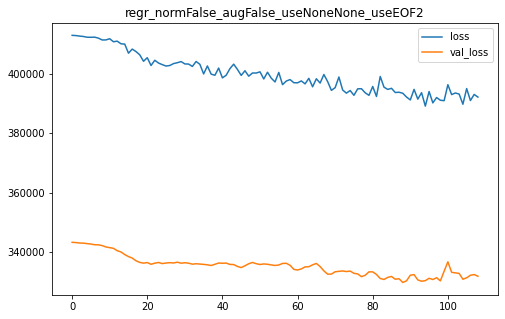

20 EOF, batch-norm


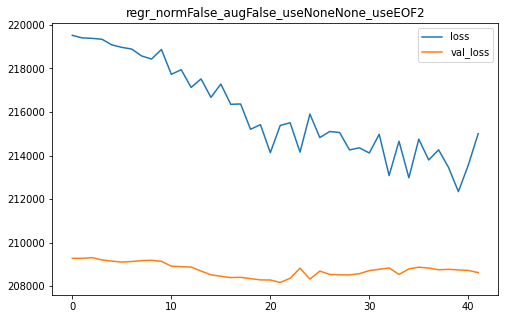

regr_normTrue_augTrue_use40_useEOF0
regr_normTrue_augTrue_use40_useEOF1
regr_normTrue_augTrue_use40_useEOF2
regr_normTrue_augTrue_use41_useEOF0
regr_normTrue_augTrue_use41_useEOF1
regr_normTrue_augTrue_use41_useEOF2
regr_normTrue_augTrue_use42_useEOF0
regr_normTrue_augTrue_use42_useEOF1
regr_normTrue_augTrue_use42_useEOF2
regr_normTrue_augTrue_use43_useEOF0
regr_normTrue_augTrue_use43_useEOF1
regr_normTrue_augTrue_use43_useEOF2
regr_normTrue_augFalse_use40_useEOF0
regr_normTrue_augFalse_use40_useEOF1
regr_normTrue_augFalse_use40_useEOF2
regr_normTrue_augFalse_use41_useEOF0
regr_normTrue_augFalse_use41_useEOF1
regr_normTrue_augFalse_use41_useEOF2
regr_normTrue_augFalse_use42_useEOF0
regr_normTrue_augFalse_use42_useEOF1
regr_normTrue_augFalse_use42_useEOF2
regr_normTrue_augFalse_use43_useEOF0
regr_normTrue_augFalse_use43_useEOF1
regr_normTrue_augFalse_use43_useEOF2
regr_normFalse_augTrue_use40_useEOF0
regr_normFalse_augTrue_use40_useEOF1
regr_normFalse_augTrue_use40_useEOF2
regr_normFals

"\nsave_pickle('drive/MyDrive/df_regr_batchnorm.pickle', df_regr_batch)\nsave_pickle('drive/MyDrive/df_regr_batchnorm20.pickle', df_regr20_batch)\nsave_pickle('drive/MyDrive/df_regr.pickle', df_regr)\nsave_pickle('drive/MyDrive/df_regr20.pickle', df_regr20)"

In [3]:
#################################################################
'''Фильтр настроен на запуск обучения всех моделей, таблицу для них можно скачать из pickle'''
#################################################################

# Добавил возможность тренировать модели не всех типов. Для этого нужно исключить из списка те или иные параметры
norm = ['True','False'] 
#norm = ['True'] 
aug = ['True','False']
#aug = ['False']
#use_01 = [None, 4, 5, 6, 7] #размер единицы деления
use_01 = [None] #размер единицы деления
#use_02 = [None, 0, 1, 2, 3, 4, 5, 6] #начальное смещение
use_02 = [None] #начальное смещение
eof = [0,1,2]
#eof = [0]

a_arr_regr = filt_arr('regr', norm, aug, use_01, use_02, eof)

d = {'Name': [], 'params': [], 'loss': [], 'val_loss': [], 'test_loss': []}
df_regr = pd.DataFrame(data=d)
df_regr20 = pd.DataFrame(data=d)

df_regr_batch = pd.DataFrame(data=d)
df_regr20_batch = pd.DataFrame(data=d)


for li_m in range(len(post_list_regr)):
  m_stri = post_list_regr[li_m]
  for uE in list(range(3)):
    print(m_stri + '_useEOF' + str(uE))
    if m_stri + '_useEOF' + str(uE) in a_arr_regr:

      #новая функция тренировки моделей на датасете без тестовой части (train_model_notest). Итоговые таблицы со значениями потерь неполные (нет разницы с тестом)
      print('10 EOF')
      exec('df_regr, ' + m_stri + '_useEOF' + str(uE) + ' = train_model_notest(eofs, df_regr, list_regr, post_list_regr, li_m, type_m = "regr", useEOF = ' + str(uE) + ',use_batch_norm = False)')
      print('20 EOF')
      exec('df_regr20, ' + m_stri + '_useEOF' + str(uE) + '_20EOF' + ' = train_model_notest(eofs20, df_regr20, list_regr20, post_list_regr, li_m, type_m = "regr", useEOF = ' + str(uE) + ',use_batch_norm = False)')

      print('10 EOF, batch-norm')
      exec('df_regr_batch, ' + m_stri + '_useEOF' + str(uE) + '_batch = train_model_notest(eofs, df_regr_batch, list_regr, post_list_regr, li_m, type_m = "regr", useEOF = ' + str(uE) + ',use_batch_norm = True)')
      print('20 EOF, batch-norm')
      exec('df_regr20_batch, ' + m_stri + '_useEOF' + str(uE) + '_20EOF' + '_batch = train_model_notest(eofs20, df_regr20_batch, list_regr20, post_list_regr, li_m, type_m = "regr", useEOF = ' + str(uE) + ',use_batch_norm = True)')



'''
save_pickle('drive/MyDrive/df_regr_batchnorm.pickle', df_regr_batch)
save_pickle('drive/MyDrive/df_regr_batchnorm20.pickle', df_regr20_batch)
save_pickle('drive/MyDrive/df_regr.pickle', df_regr)
save_pickle('drive/MyDrive/df_regr20.pickle', df_regr20)'''

Чтение таблиц из pickle (pickles сделаны для версий с отделением тестового датасета)

In [ ]:
df_regr_batch = read_pickle('drive/MyDrive/df_regr_batchnorm.pickle')
df_regr20_batch = read_pickle('drive/MyDrive/df_regr_batchnorm20.pickle')
df_regr = read_pickle('drive/MyDrive/df_regr.pickle')
df_regr20 = read_pickle('drive/MyDrive/df_regr20.pickle')

'''
#Добавил в таблицы поля с разницей значений между тестом и значениями с тренировки
df_regr20_batch['test_loss-loss'] = df_regr20_batch.apply(lambda row: diff(row, 'test_loss-loss'), axis=1)
df_regr20_batch['test_loss-val_loss'] = df_regr20_batch.apply(lambda row: diff(row, 'test_loss-val_loss'), axis=1)

df_regr['test_loss-loss'] = df_regr.apply(lambda row: diff(row, 'test_loss-loss'), axis=1)
df_regr['test_loss-val_loss'] = df_regr.apply(lambda row: diff(row, 'test_loss-val_loss'), axis=1)

df_regr_batch['test_loss-loss'] = df_regr_batch.apply(lambda row: diff(row, 'test_loss-loss'), axis=1)
df_regr_batch['test_loss-val_loss'] = df_regr_batch.apply(lambda row: diff(row, 'test_loss-val_loss'), axis=1)

df_regr20['test_loss-loss'] = df_regr20.apply(lambda row: diff(row, 'test_loss-loss'), axis=1)
df_regr20['test_loss-val_loss'] = df_regr20.apply(lambda row: diff(row, 'test_loss-val_loss'), axis=1)'''

# Оценка результатов

Ниже выбраны записи из таблицы без использования X-леток

In [10]:
norm = ['True','False']
aug = ['True','False']
#use_01 = [None, 4, 5, 6, 7]
use_01 = [None]
#use_02 = [None, 0, 1, 2, 3, 4, 5, 6]
use_02 = [None]
eof = [0,1,2]

a_arr_regr = filt_arr('regr', norm, aug, use_01, use_02, eof)

df_regr1 = df_regr[df_regr['Name'].isin(a_arr_regr)]
df_regr_batch1 = df_regr_batch[df_regr_batch['Name'].isin(a_arr_regr)]
df_regr20_batch1 = df_regr20_batch[df_regr20_batch['Name'].isin(a_arr_regr)]
df_regr201 = df_regr20[df_regr20['Name'].isin(a_arr_regr)]


Горизонтальные бары

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


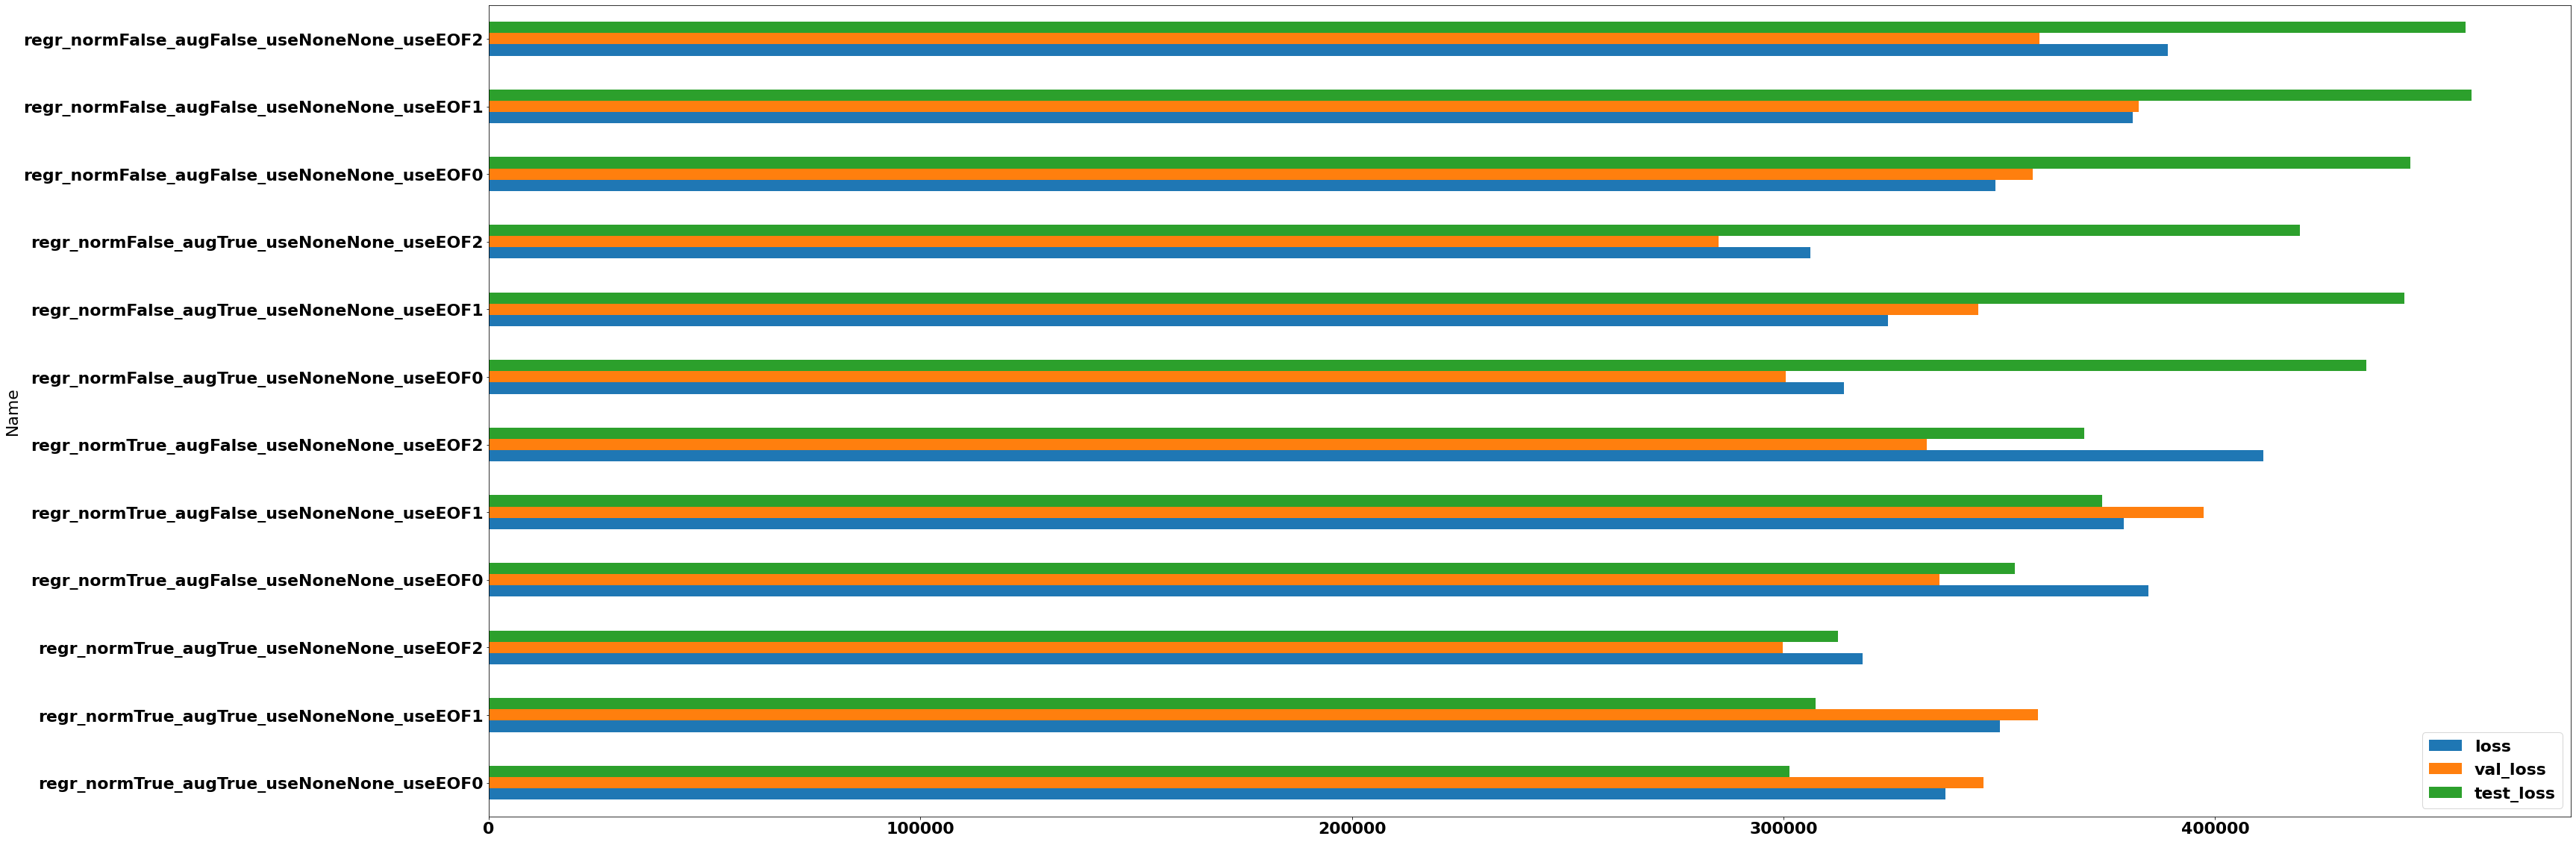

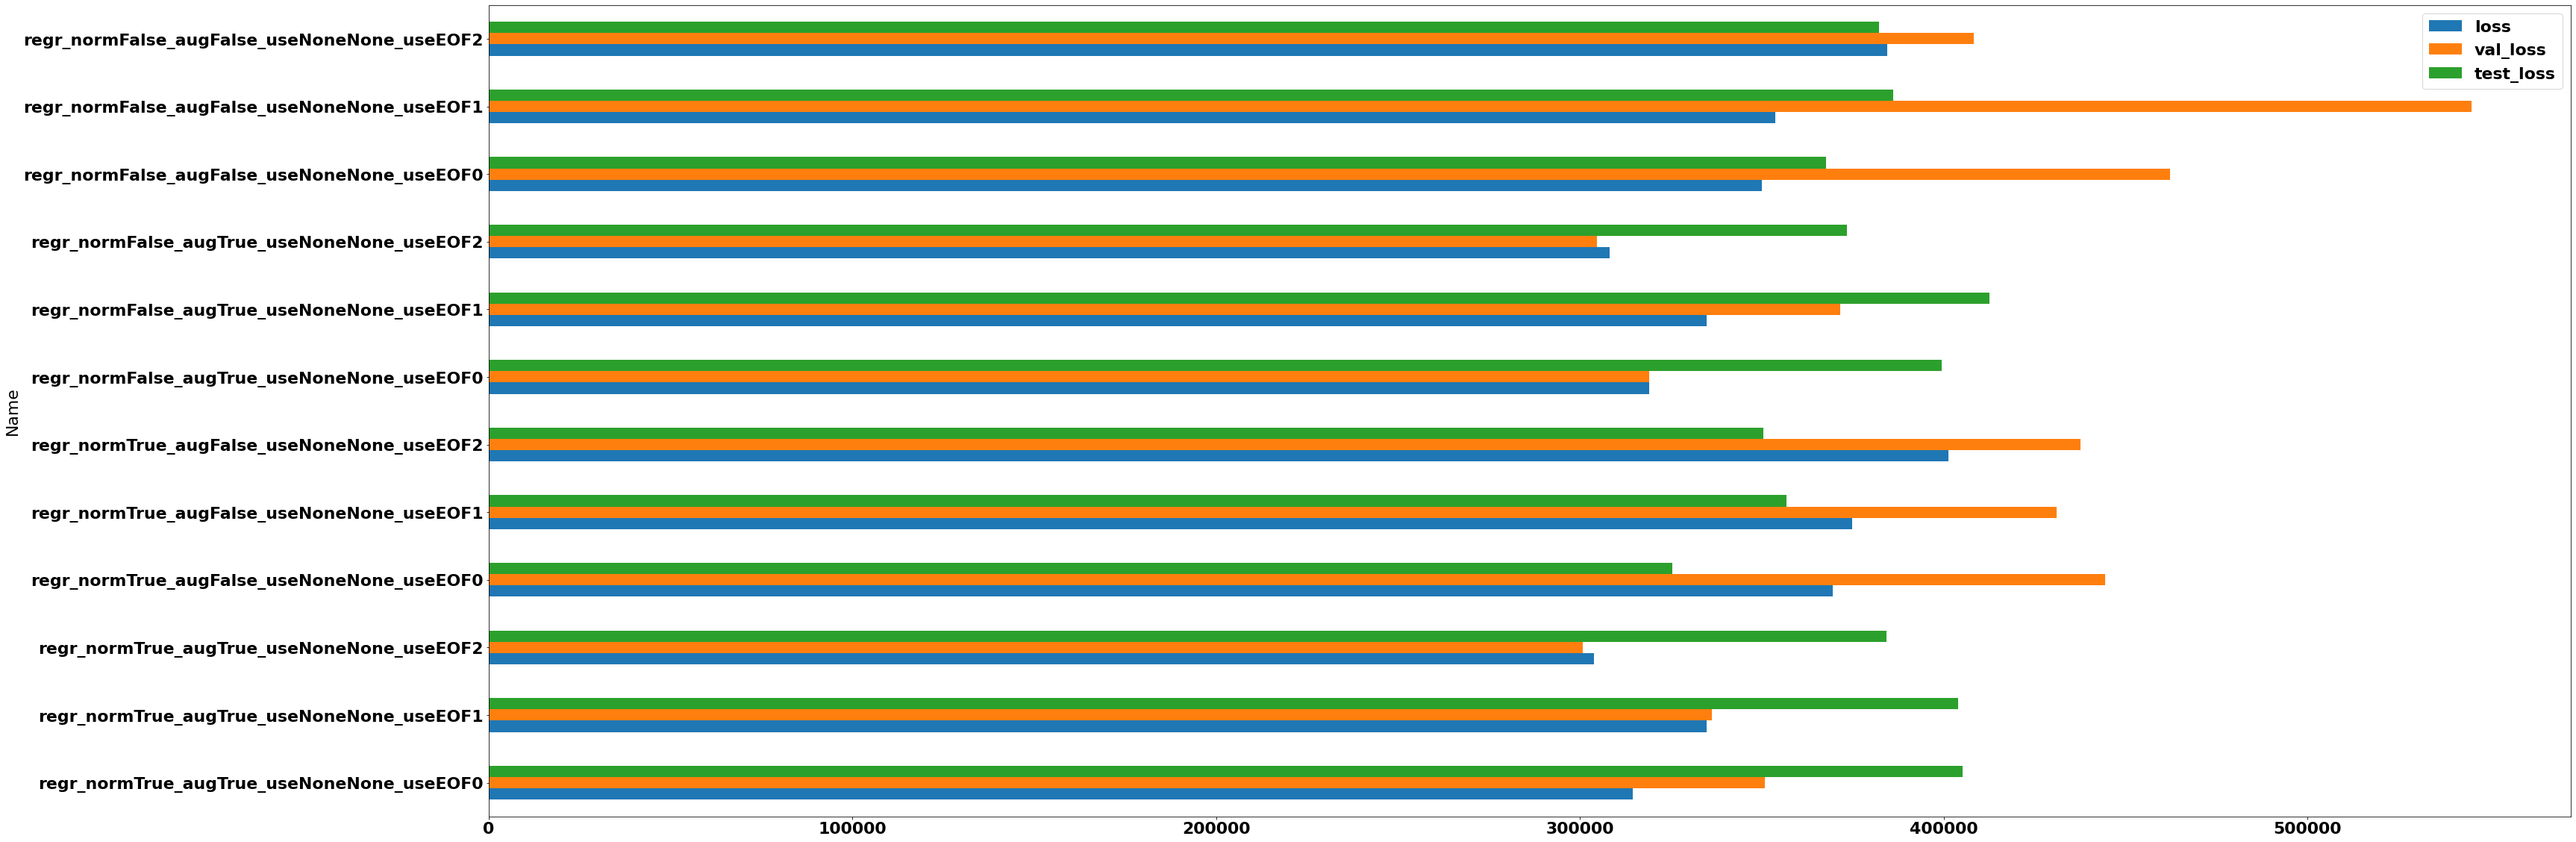

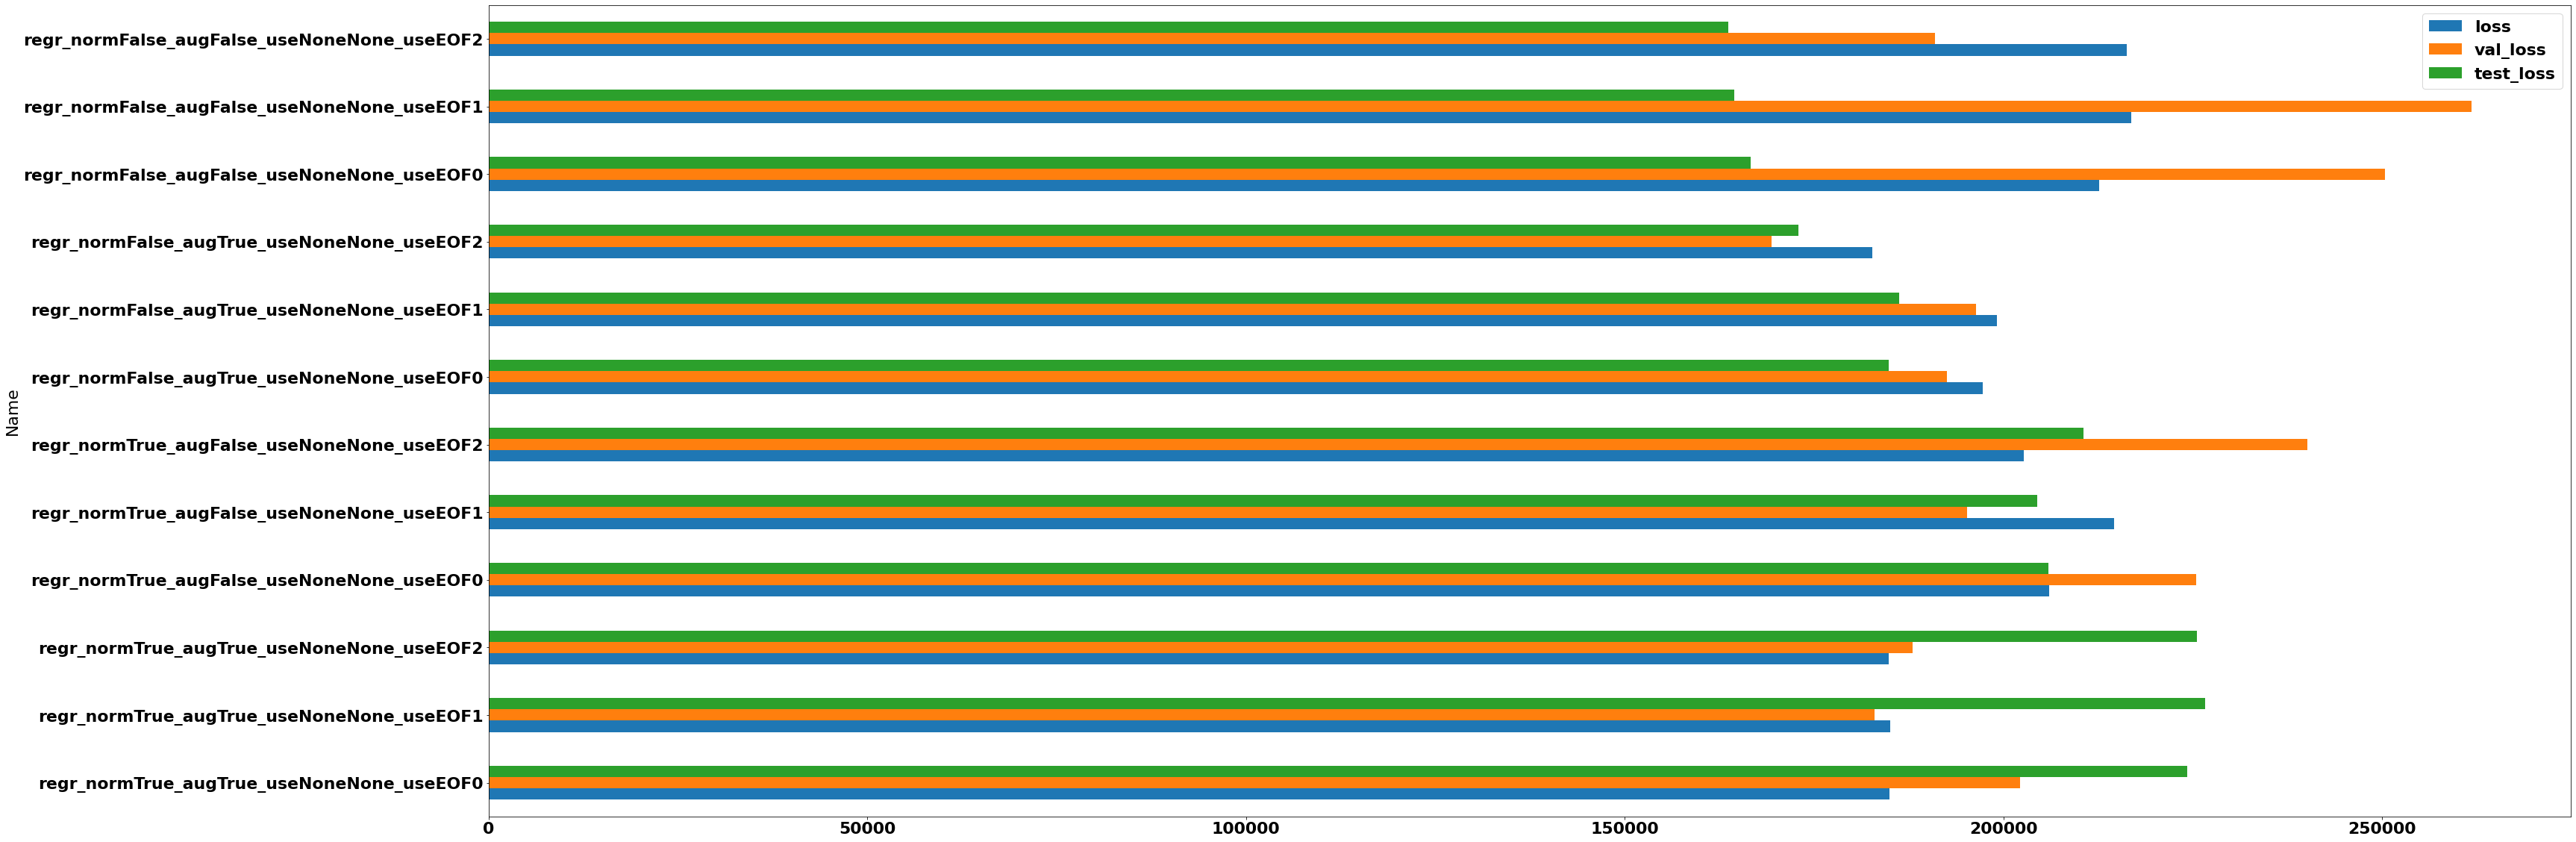

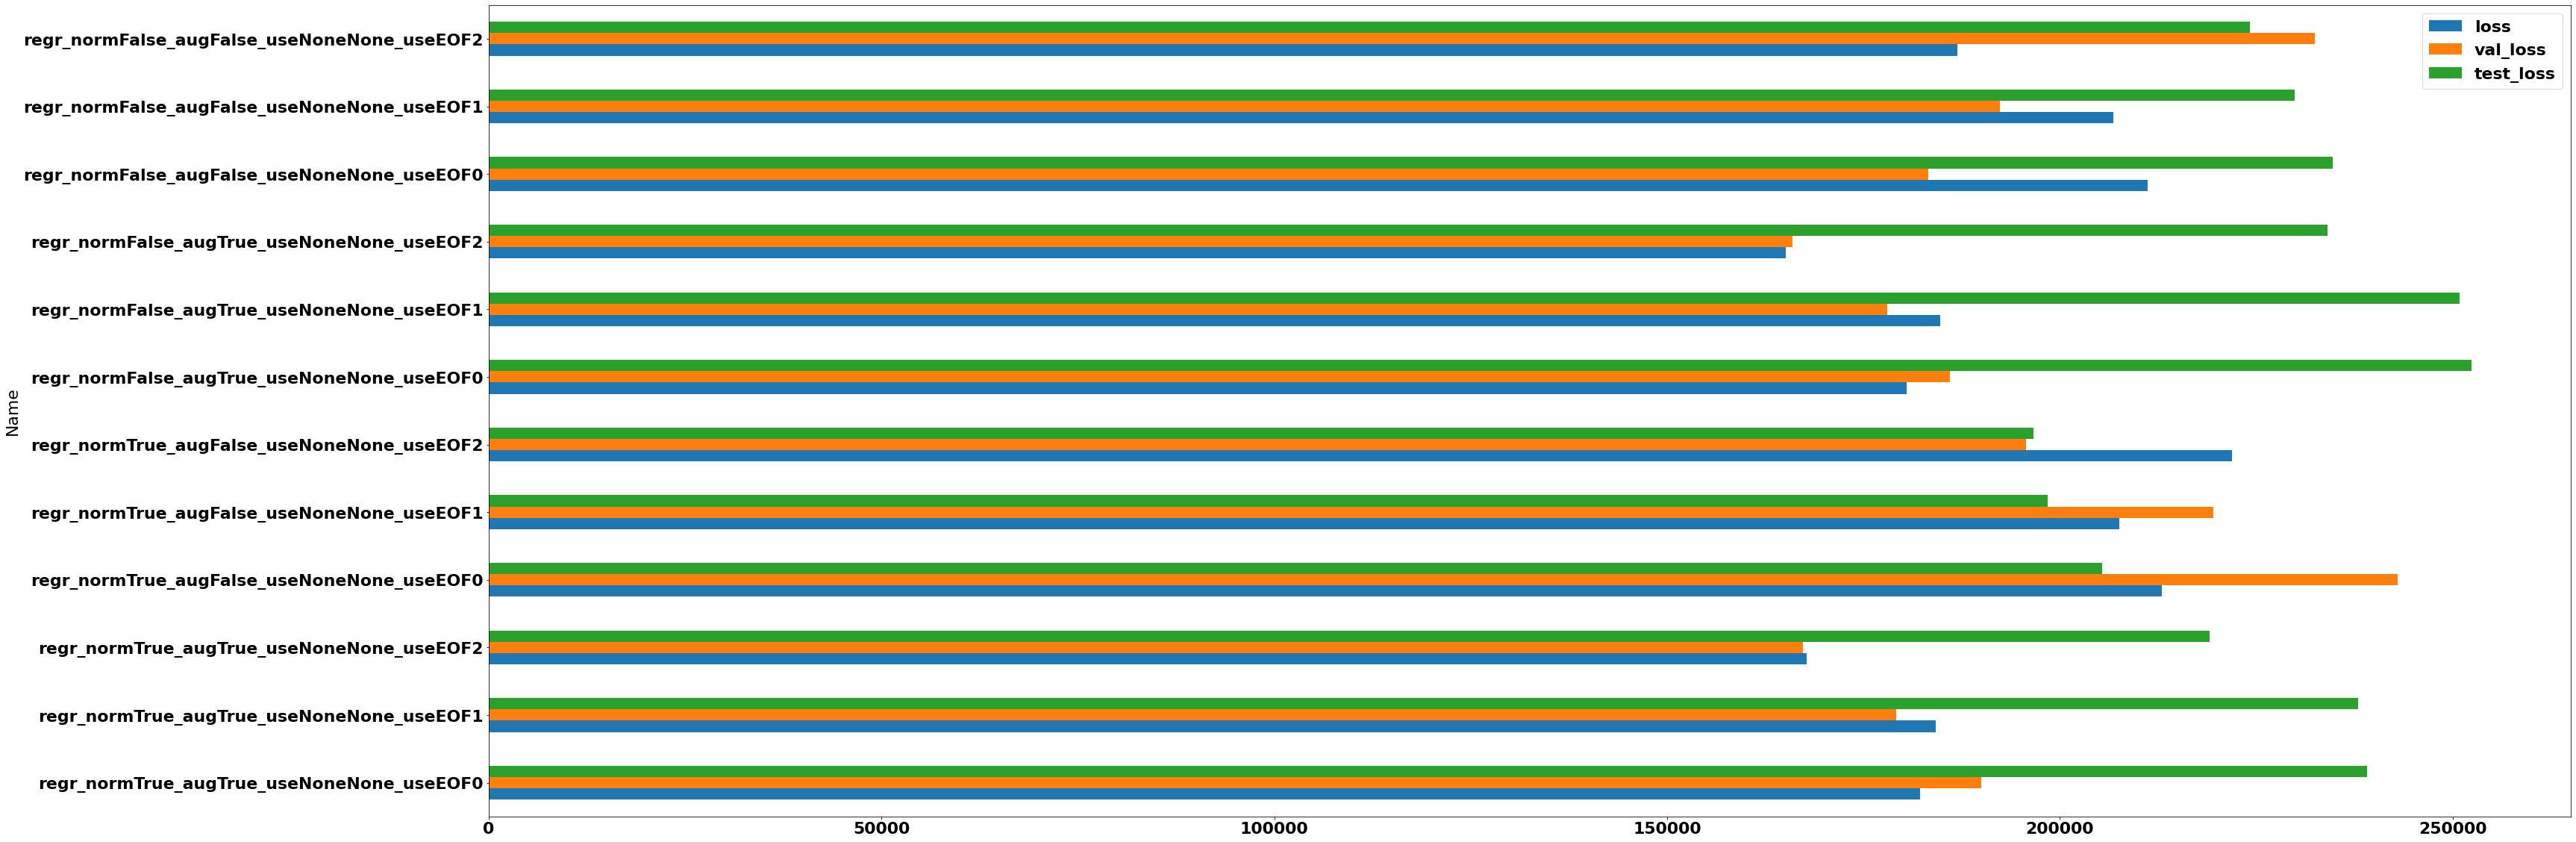

In [11]:
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

plt.rcParams["figure.figsize"] = [50, 20]

df_regr1.plot.barh(x= 'Name')
df_regr_batch1.plot.barh(x= 'Name')
df_regr20_batch1.plot.barh(x= 'Name')
df_regr201.plot.barh(x= 'Name')

Те же значения, но в виде цветной таблицы <br>
Заметно приемущество моделей без использования EOF

In [12]:
df_regr1.style.background_gradient(cmap="Blues")

In [13]:
df_regr_batch1.style.background_gradient(cmap="Blues")

In [14]:
df_regr201.style.background_gradient(cmap="Blues")

In [15]:
df_regr20_batch1.style.background_gradient(cmap="Blues")

Выбираем для каждой из 4 лучшую по показателю test_loss из таблицы и делаем на них предикт

In [26]:
pred_res = regr_normTrue_augTrue_useNoneNone_useEOF0.predict(np.asarray(trsgi_values))
pred_res_batch = regr_normTrue_augFalse_useNoneNone_useEOF0_batch.predict(np.asarray(trsgi_values))
pred_res20 = regr_normTrue_augFalse_useNoneNone_useEOF2_20EOF.predict(np.asarray(trsgi_values))

pred_res_batch20_0 = regr_normFalse_augFalse_useNoneNone_useEOF0_20EOF_batch.predict(np.asarray(trsgi_values))
pred_res_batch20_1 = regr_normFalse_augFalse_useNoneNone_useEOF1_20EOF_batch.predict(np.asarray(trsgi_values))
pred_res_batch20_2 = regr_normFalse_augFalse_useNoneNone_useEOF2_20EOF_batch.predict(np.asarray(trsgi_values))

Визуальная проверка предсказаний регрессионной модели для определенного года.

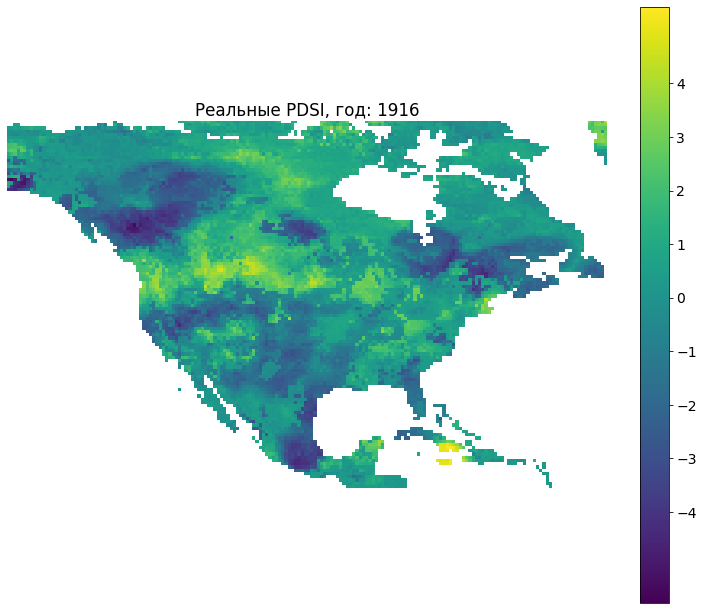

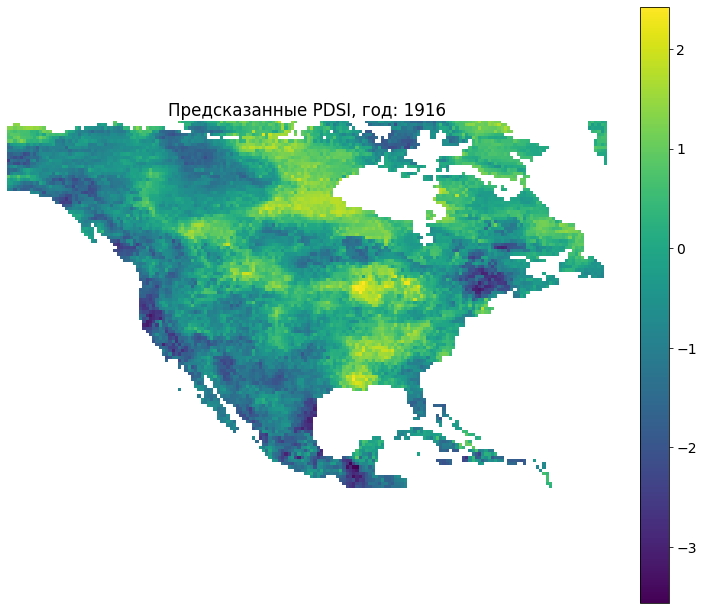

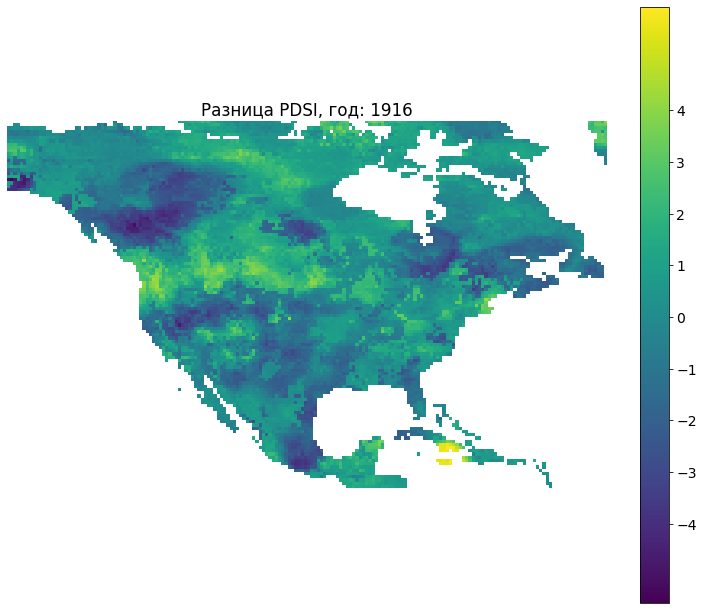

In [28]:
font = {
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

plt.rcParams["figure.figsize"] = [10, 10]

regr_graph_check(year = 15, 
                 base_year = 1901, 
                 df_data = df_data, 
                 ds_n = ds_n, 
                 pca = pca20,
                 pcs = pred_res_batch20_0, 
                 eofs = eofs20, 
                 eigvals = eigvals20,
                 type_f = 'Both',
                 scale_type = 2)

Рассчет коэффициента корреляции между реальными и предсказанными значениями для определенного года.
Также приведены гистограммы по реальным и предсказанным значениям, тесты на нормальность (normaltest и тест Колмогорова-Смирнова), и коэффициенты корреляции Пирсона и Спирмана <br><br>
Значения коэффициентов корреляции выше у моделей с 20 EOF, а также у моделей, построенных с использованием batch-нормализации

In [31]:
#Для вывода картинок нужно убрать параметр type_ret
corr, corr_s = corr_coef_year(year = 10, 
                 base_year = 1901, 
                 df_data = df_data, 
                 ds_n = ds_n, 
                 pca = pca,
                 pcs = pred_res, 
                 eofs = eofs, 
                 eigvals = eigvals,
                 scale_type = 2,
                 type_ret = 'Mute')

corr_batch, corr_s_batch = corr_coef_year(year = 10, 
                 base_year = 1901, 
                 df_data = df_data, 
                 ds_n = ds_n, 
                 pca = pca,
                 pcs = pred_res_batch, 
                 eofs = eofs, 
                 eigvals = eigvals,
                 scale_type = 2,
                 type_ret = 'Mute')

corr_20, corr_s_20 = corr_coef_year(year = 10, 
                 base_year = 1901, 
                 df_data = df_data, 
                 ds_n = ds_n, 
                 pca = pca20,
                 pcs = pred_res20, 
                 eofs = eofs20, 
                 eigvals = eigvals20,
                 scale_type = 2,
                 type_ret = 'Mute')

corr_20_batch, corr_s_20_batch = corr_coef_year(year = 10, 
                 base_year = 1901, 
                 df_data = df_data, 
                 ds_n = ds_n, 
                 pca = pca20,
                 pcs = pred_res_batch20_0, 
                 eofs = eofs20, 
                 eigvals = eigvals20,
                 scale_type = 2,
                 type_ret = 'Mute')



print(corr, corr_s)
print(corr_batch, corr_s_batch)
print(corr_20, corr_s_20)
print(corr_20_batch, corr_s_20_batch)

(0.11784875737186418, 2.7960120588251e-35) SpearmanrResult(correlation=0.11222039077660968, pvalue=3.9609130379626904e-32)
(0.04709520603007611, 7.86669284368844e-07) SpearmanrResult(correlation=0.03566371322593843, pvalue=0.00018475746134510762)
(0.3491591345282733, 1.66204874992e-312) SpearmanrResult(correlation=0.36696965509616136, pvalue=0.0)
(0.2745523996823804, 3.1497945565298943e-189) SpearmanrResult(correlation=0.29102361710920044, pvalue=2.080587307990455e-213)


In [37]:
#аналогично для пикселя
corr, corr_s = corr_coef_pixel(str_lat = '70.75',
                str_lon = '-71.25',
                 base_year = 1901, 
                 df_data = df_data, 
                 ds_n = ds_n, 
                 pca = pca20,
                 pcs = pred_res_batch20_0, 
                 eofs = eofs20, 
                 eigvals = eigvals20,
                 scale_type = 2,
                 type_ret = 'Mute')
print(corr, corr_s)

(0.14687457687430977, 0.12930630135971655) SpearmanrResult(correlation=0.11404141807776848, pvalue=0.2399143016193249)


Результат для модели с 20 EOF и с использование batch-нормализации, без слоя с EOF на выходе 

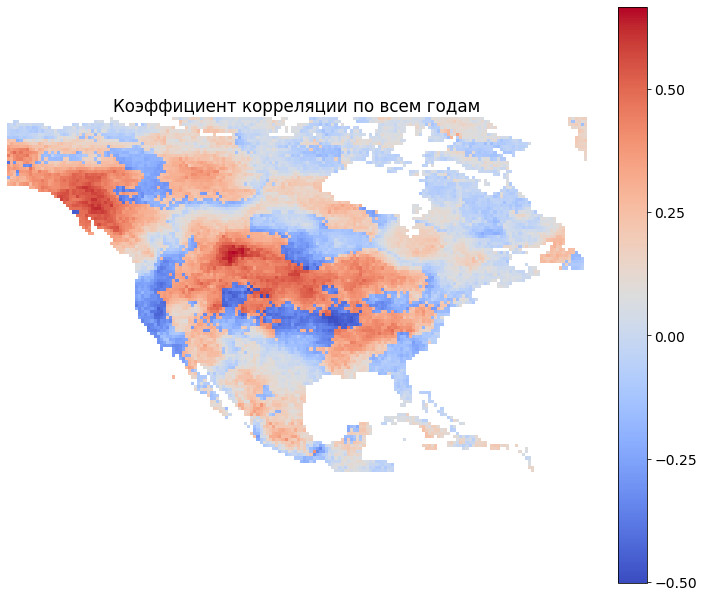

In [38]:
corr_s_l_2d = corr_coef_pixel_all_years(
                 df_data = df_data, 
                 ds_n = ds_n, 
                 pca = pca20,
                 pcs = pred_res_batch20_0, 
                 eofs = eofs20, 
                 eigvals = eigvals20,
                 scale_type = 2)

Результат для модели с 20 EOF и с использование batch-нормализации, со слоем с EOF на выходе 

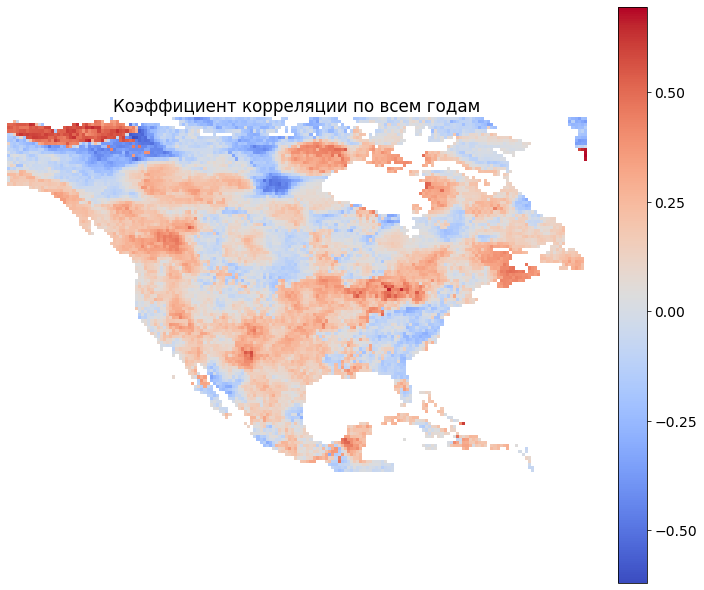

In [41]:
corr_s_l_2d = corr_coef_pixel_all_years(
                 df_data = df_data, 
                 ds_n = ds_n, 
                 pca = pca20,
                 pcs = pred_res_batch20_1, 
                 eofs = eofs20, 
                 eigvals = eigvals20,
                 scale_type = 2)

Результат для модели с 20 EOF и с использование batch-нормализации, со слоем с примитивом EOF на выходе 

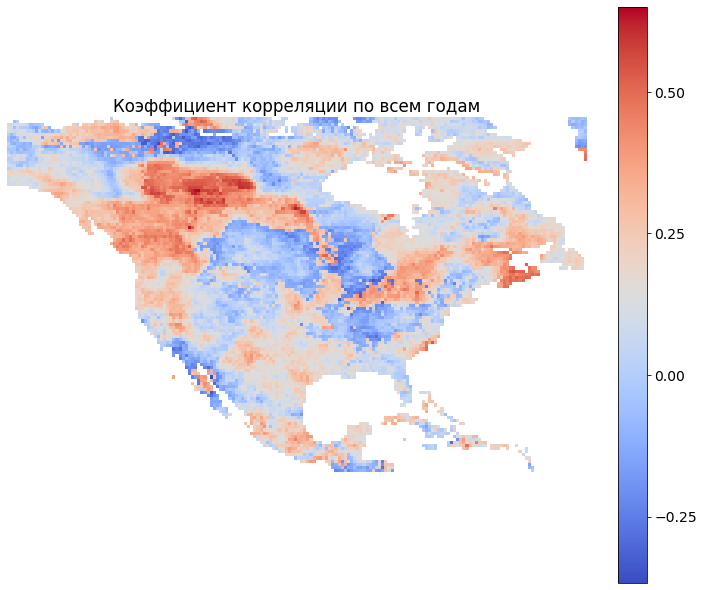

In [42]:
corr_s_l_2d = corr_coef_pixel_all_years(
                 df_data = df_data, 
                 ds_n = ds_n, 
                 pca = pca20,
                 pcs = pred_res_batch20_2, 
                 eofs = eofs20, 
                 eigvals = eigvals20,
                 scale_type = 2)